Парная линейная регрессия на примере данных: Количество пострадавших за 2013-2019г. (по месяцам)/ материальный ущерб

In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import scipy as sc
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [7]:
#чтение данных
data = pd.ExcelFile('data_regression.xlsx')
data = data.parse('Лист1')
data

,Дата,"Материальный ущерб, млн","Количество пострадавших, чел","Количество пожаров, ед"
0,2013-01,1385.290,2576,13840.0
1,2013-02,1189.031,2049,11970.0
2,2013-03,1147.669,2178,12570.0
3,2013-04,1040.049,1855,12820.0
4,2013-05,2247.079,1708,14140.0
...,...,...,...,...
79,2019-08,1608.944,1134,32550.0
80,2019-09,1165.206,1358,33440.0
81,2019-10,1102.646,1342,30270.0
82,2019-11,1179.242,1775,27570.0


In [8]:
#удаляем выбросы
from scipy import stats
data = data.drop('Дата', axis = 1)
data = data[(np.abs(stats.zscore(data)) < 2).all(axis=1)]

In [9]:
data

,"Материальный ущерб, млн","Количество пострадавших, чел","Количество пожаров, ед"
1,1189.031,2049,11970.0
2,1147.669,2178,12570.0
3,1040.049,1855,12820.0
4,2247.079,1708,14140.0
5,898.432,1444,12180.0
...,...,...,...
79,1608.944,1134,32550.0
80,1165.206,1358,33440.0
81,1102.646,1342,30270.0
82,1179.242,1775,27570.0


In [10]:
victims = data['Количество пострадавших, чел'] 
damage = data['Материальный ущерб, млн']

Text(0.5, 1.0, 'Диаграмма рассеяния')

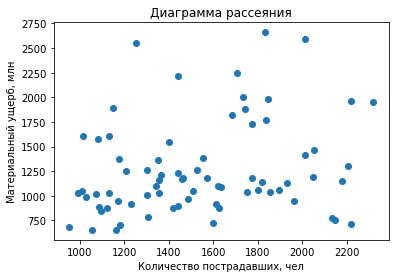

In [11]:
fig, ax = plt.subplots()
plt.scatter(victims, damage)

plt.xlabel('Количество пострадавших, чел')
plt.ylabel('Материальный ущерб, млн')
plt.title('Диаграмма рассеяния')

In [12]:
victims = victims.values.reshape(-1,1)
damage = damage.values.reshape(-1,1)

linreg = LinearRegression()
linreg.fit(victims, damage)
damage_pred = linreg.predict(victims)

a = linreg.intercept_
b = linreg.coef_[0]

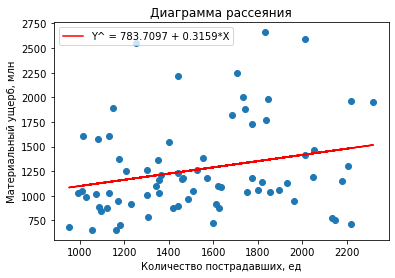

In [13]:
plt.scatter(victims, damage)
plt.plot(victims, damage_pred,color = 'red', label = 'Y^ = {} + {}*X'.format(*a.round(4),*b.round(4)))

plt.xlabel('Количество пострадавших, ед')
plt.ylabel('Материальный ущерб, млн')
plt.legend()
plt.title('Диаграмма рассеяния')
plt.show()

In [14]:
print('Уравнение ПЛР: Y^ = {} + {}*X'.format(*a,*b))

Уравнение ПЛР: Y^ = 783.7097453707411 + 0.3158879533838652*X


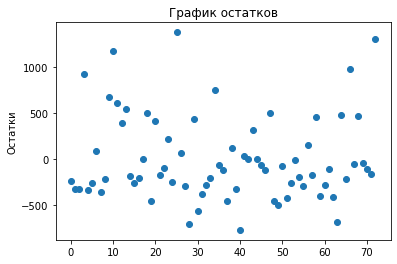

In [15]:
# график остатков
n = [i for i in range(0,len(damage))]
E = damage - damage_pred
plt.scatter(n, E)

plt.ylabel('Остатки')
plt.title('График остатков')
plt.show()

In [16]:
from scipy import stats

victims = data['Количество пострадавших, чел']
damage = data['Материальный ущерб, млн']

slope, intercept, r_value, p_value, std_err = stats.linregress(victims, damage)

a = intercept
b = slope


In [17]:
#средняя ошибка аппроксимации

victims = data['Количество пострадавших, чел']
damage = data['Материальный ущерб, млн']

victims = victims.values.reshape(-1,1)
damage = damage.values.reshape(-1,1)

damage_pred = linreg.predict(victims)

A = (sum(abs(damage - damage_pred)/abs(damage))*100)/len(damage)

In [18]:
print("Средняя относительная ошибка аппроксимации = ", *A)

Средняя относительная ошибка аппроксимации =  29.24657071061757


In [19]:
# критерий стьюдента

s_res = pow(sum(pow(E, 2))/(len(damage)-2), 0.5)
sig_x = pow(sum(pow((victims - np.mean(victims)),2))/len(victims),0.5)

m_a = (s_res * pow(sum(pow(victims, 2)),0.5)) / (sig_x*len(victims))
m_b = s_res/(sig_x*pow(len(victims),0.5))

In [20]:
# вычислим t-статистики
m_b = m_b[0]
m_a = m_a[0]

t_a = intercept/m_a
t_b = slope/m_b
t_r = ((len(victims)-2) * r_value)/pow(1 - pow(r_value,2), 0.5)

In [21]:
print("m_a = ", round(m_a,2))
print("m_b = ", round(m_b,2))

print("t_a = ", round(t_a,2))
print("t_b = ", round(t_b,2))
print("t_r = ", round(t_r,2))

m_a =  235.17
m_b =  0.15
t_a =  3.33
t_b =  2.12
t_r =  17.9


In [22]:
t_cr = 1.992543495 #t_cr(0,975; 74)
#t_b > t_cr, а значит оценка коэффициента b статистически значима
#t_a > t_cr, а значит оценка коэффициента a статистически значима

In [23]:
#критерий фишера

r2_score = 1 - sum(pow(damage - damage_pred,2))/sum(pow(damage - np.mean(damage),2))
F = r2_score* (len(victims) - 2)/(1 - r2_score)
F_cr = 3.98

print('F_stat = ', *F, '> F_cr = ', F_cr, ' => Н0 отклоняется => построение уравнения ПЛР признается статистически значимым')

F_stat =  4.513218007410437 > F_cr =  3.98  => Н0 отклоняется => построение уравнения ПЛР признается статистически значимым


In [24]:
# доверительные интервалы для параметров ПЛР

print('{} ∈ a ∈ {}'.format(a - (m_a*t_cr), a + (m_a*t_cr)))
print('{} ∈ b ∈ {}'.format(b - (m_b*t_cr), b + (m_b*t_cr)))

315.1201041274388 ∈ a ∈ 1252.2993866140437
0.01961110360552848 ∈ b ∈ 0.6121648031622016


In [25]:
# точечный прогноз значения y для фиксированного x

x_fix = victims[30]
n = len(victims)

y_p = a + b * x_fix
m_y = s_res * pow(1 + 1/n + pow((x_fix - np.mean(victims)), 2)/sum(pow(victims - np.mean(victims),2)), 0.5)

In [26]:
m_y

array([468.18673226])

In [27]:
print('Реальное значение: {}, прогнозное значение: {}, стандартная ошибка: {}'.format(*damage[30], *y_p, *abs((damage[30]- y_p)/damage[30]*100)))
print('Доверительный интервал для точечного прогноза: {} ∈ y_p ∈ {}'.format(*y_p - m_y*t_cr, *y_p + m_y*t_cr))

Реальное значение: 719.972, прогнозное значение: 1288.1828069247738, стандартная ошибка: 78.92123678764922
Доверительный интервал для точечного прогноза: 355.3003791229129 ∈ y_p ∈ 2221.0652347266346


In [28]:
# Гипотеза о гомоскедастичности наблюдений по методу Гольдфельда-Квандта

data_sort = data.sort_values(by = ['Количество пострадавших, чел'])
n = len(victims)
m = 10

l_1 = int((n - m)/2)
l_2 = int((n + m)/2 +1)

data_1 = data_sort.iloc[1: l_1]
data_2 = data_sort.iloc[l_2:n]

In [29]:
victims_1 = data_1[['Количество пострадавших, чел']]
damage_1 = data_1[['Материальный ущерб, млн']]

victims_1 = victims_1.values.reshape(-1,1)
damage_1 = damage_1.values.reshape(-1,1)

linreg_1 = LinearRegression()
linreg_1.fit(victims_1, damage_1)
damage_pred_1 = linreg_1.predict(victims_1)

In [30]:
victims_2 = data_2[['Количество пострадавших, чел']]
damage_2 = data_2[['Материальный ущерб, млн']]

victims_2 = victims_2.values.reshape(-1,1)
damage_2 = damage_2.values.reshape(-1,1)

linreg_2 = LinearRegression()
linreg_2.fit(victims_2, damage_2)
damage_pred_2 = linreg_2.predict(victims_2)

In [31]:
S_1 = sum(pow(damage_1 - damage_pred_1,2))
S_2 = sum(pow(damage_2 - damage_pred_2,2))

F_stat = S_2/S_1
F_cr = 1.89
print(f'F_stat: {round(*F_stat,2)} < F_cr: {F_cr} => принимается гипотеза о гомоскедастичности')

F_stat: 1.83 < F_cr: 1.89 => принимается гипотеза о гомоскедастичности
